# Which neighborhood makes for the most pleasant walk?
### By Patrick McKeever
### Datasets: [Non-Traffic-Citations](https://data.wprdc.org/dataset/non-traffic-citations), [Neighborhood Size](https://data.wprdc.org/dataset/neighborhoods2)
## This data includes non-traffic citations by neighborhood for harassment, property damage, littering, excessive noise, disorderly conduct, public intoxication, and more since 2015. 

In [59]:
import pandas as pd

# Loading in the data
citations = pd.read_csv('Non-Traffic-Citations.csv')

# Removing non-neighborhoods from the dataset
citations = citations[citations['NEIGHBORHOOD']!= 'Outside County']
citations = citations[citations['NEIGHBORHOOD']!= 'Outside State']
citations = citations[citations['NEIGHBORHOOD']!= 'Unable To Retrieve Address']

# counting the # of citations commited in each neighborhood
counts = citations.groupby('NEIGHBORHOOD').count()['OFFENSES']

#sorting and printing these values
pd.set_option('display.max_rows', 10)
counts = counts.sort_values(ascending=False)
print(counts)


NEIGHBORHOOD
South Side Flats             3269
Central Business District    1767
Central Oakland               650
North Shore                   542
Carrick                       411
                             ... 
Ridgemont                       4
Mt. Oliver Neighborhood         4
St. Clair                       3
Mt. Oliver Boro                 2
Chartiers City                  2
Name: OFFENSES, Length: 94, dtype: int64


#### The neighborhoods high in citations are also some of the largest neighborhoods in all of Pittsburgh, compared to the small neighborhoods low in citations. To fairly assess the safety of these neighborhoods, they need to be weighted by size. In a small neighborhood like Chartiers City, there aren't many citations, but there also isn't much area to walk in. I'll divide each citation amount by the square miles of each neighborhood for the final metric.

In [60]:
# Loading in the data
size = pd.read_csv('Size.csv')

# Limiting the dataframe to just the neighborhood and its size
size = size.loc[:, ['hood', 'sqmiles']]

# Merging the size data with the citation data
size = size.rename(columns={'hood': 'NEIGHBORHOOD'})
merged = pd.merge(size, counts, on='NEIGHBORHOOD')
merged = merged[merged['sqmiles']!= 0]
merged = merged.rename(columns={'OFFENSES': 'Citations'})
merged = merged.rename(columns={'NEIGHBORHOOD': 'Neighborhood'})

# Creating a new columnn for the final metric
merged['Citations/sqmile'] = merged['Citations']/merged['sqmiles']

# Displayingb the data
merged = merged.sort_values(by='Citations/sqmile', ascending = False)
print(merged)

                 Neighborhood  sqmiles  Citations  Citations/sqmile
86           South Side Flats    0.936       3269       3492.521368
42  Central Business District    0.640       1767       2760.937500
45            Central Oakland    0.281        650       2313.167260
29                North Shore    0.303        542       1788.778878
43             East Allegheny    0.236        342       1449.152542
..                        ...      ...        ...               ...
80             Swisshelm Park    0.480          6         12.500000
63                  Ridgemont    0.369          4         10.840108
37              New Homestead    0.794          8         10.075567
71                  St. Clair    0.310          3          9.677419
25                       Hays    1.750          8          4.571429

[87 rows x 4 columns]


### Here are the 15 least pleasant neighborhoods to walk in Pittsburgh according to citations/sqmile since 2015.

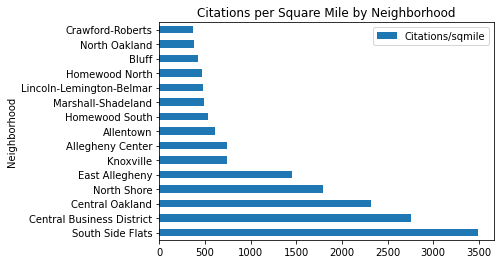

In [61]:
plt = merged.iloc[:15].plot(kind='barh', x="Neighborhood", y="Citations/sqmile", title="Citations per Square Mile by Neighborhood")

### And here are the 15 most pleasant neighborhoods.

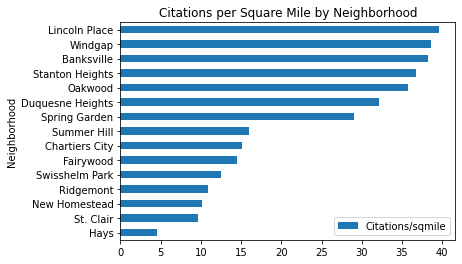

In [62]:
merged_reverse = merged.sort_values(by='Citations/sqmile')
plt = merged_reverse.iloc[:15].plot(kind='barh', x="Neighborhood", y="Citations/sqmile", title="Citations per Square Mile by Neighborhood")